# Alberi di classificazione
Lavoriamo sul Breast Cancer Dataset per gli alberi di classificazione. Importiamo tutto il necessario.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import graphviz
import os
from time import time

import random
from ISLP import load_data

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams["figure.figsize"] = (10, 14)

Creiamo la funzione per plottare gli alberi e poi anche il dataset che ci interessa.

In [2]:
def albero(X_dati, y_dati, predittori, classi, seed = 1, n_train = 75):
    
    lunghezza = range(len(y_dati))
    casual = random.sample(lunghezza, 75)
    esclusi = []
    for i in range(len(y_dati)):
        if i not in esclusi:
            esclusi.append(i)

    # print(esclusi)

    X_cas = X_dati[casual, :]
    y_cas = y_dati[casual]
    errori = ['gini', 'entropy']

    for i in range(2):
        
        plt.figure(figsize=(9, 9))
        
        t_in = time()
        
        tree_maker = DecisionTreeClassifier(min_samples_leaf = 5, criterion = errori[i])
        # Ci sono diversi parametri da settare nel caso si voglia
        tree_maker.fit(X_cas, y_cas)
        tempo = time() - t_in
        print(f"Albero fittato in {tempo} s")
        plot_tree(tree_maker, #label = 'root', 
                  feature_names = predittori,
                  class_names=classi,
                  filled = True,
                  rounded = True, 
                  impurity = True)
        # plt.title('Albero di classificazione')
        plt.title(f"Albero con misura {errori[i]} e seed {seed}")
        plt.show()

        X_pred = X_dati[esclusi, :]
        y_test = y_dati[esclusi]
        y_pred = tree_maker.predict(X_pred)

        acc_tree = accuracy_score(y_test, y_pred)
        print(f"Accuratezza dell'albero con {errori[i]}: {acc_tree}")

In [3]:
# Creazione del dataset

cancer = load_breast_cancer()

X_cancer = cancer.data
y_cancer = cancer.target

X_cancer1 = X_cancer[:, (1, 2, 3, 4, 5)]

Albero fittato in 0.012557029724121094 s


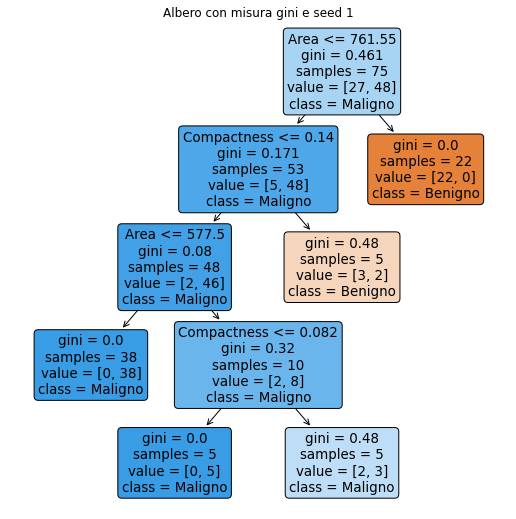

Accuratezza dell'albero con gini: 0.8927943760984183
Albero fittato in 0.001783609390258789 s


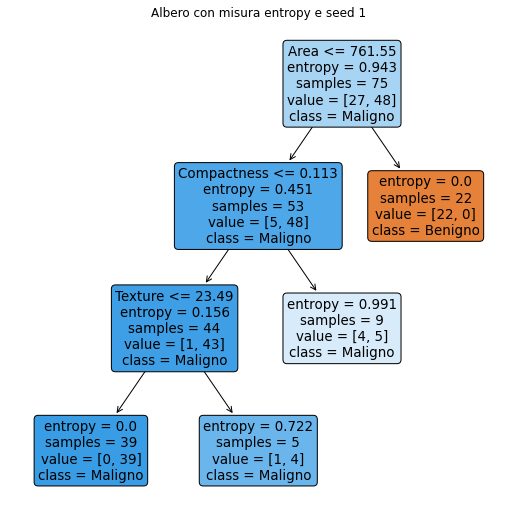

Accuratezza dell'albero con entropy: 0.8629173989455184


In [4]:
albero(X_cancer1, y_cancer, predittori = ['Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness'], 
      classi = ['Benigno', 'Maligno'])

Albero fittato in 0.0009965896606445312 s


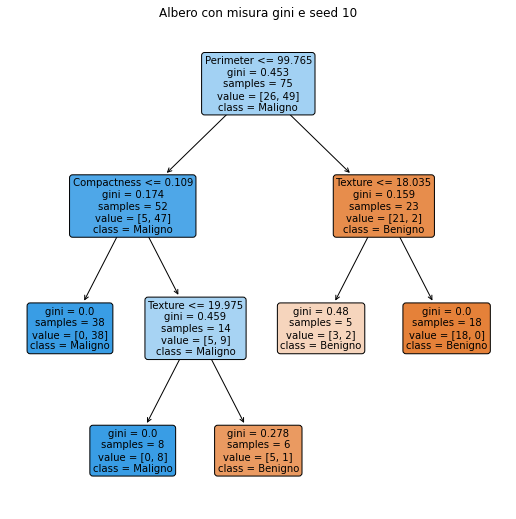

Accuratezza dell'albero con gini: 0.9068541300527241
Albero fittato in 0.000986337661743164 s


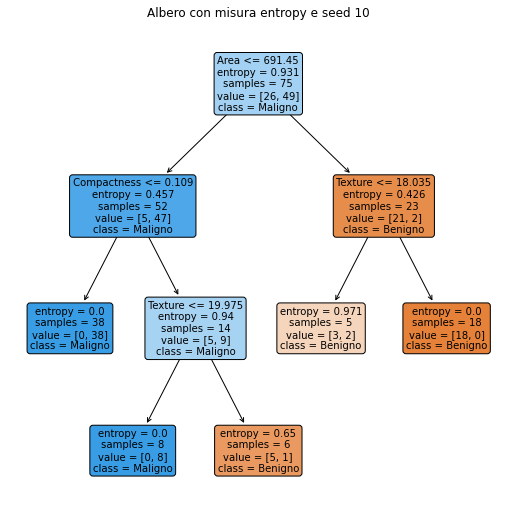

Accuratezza dell'albero con entropy: 0.9138840070298769


In [5]:
albero(X_cancer1, y_cancer, predittori = ['Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness'], 
      classi = ['Benigno', 'Maligno'], seed = 10)

Albero fittato in 0.0010423660278320312 s


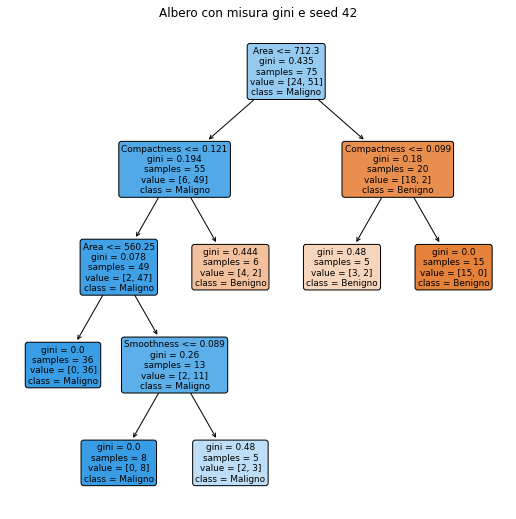

Accuratezza dell'albero con gini: 0.8875219683655536
Albero fittato in 0.0010073184967041016 s


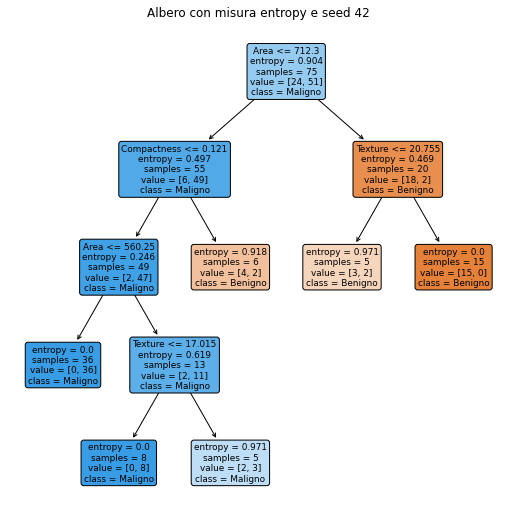

Accuratezza dell'albero con entropy: 0.8875219683655536


In [6]:
albero(X_cancer1, y_cancer, predittori = ['Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness'], 
      classi = ['Benigno', 'Maligno'], seed = 42)

## Foreste randomiche
Vediamo ora come confrontare le foreste randomiche.

In [7]:
random_for = RandomForestClassifier(n_estimators = 100, oob_score = True)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=1)

t0 = time()
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
# plot_tree(tree_maker, #label = 'root', 
#           feature_names = ['Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness'],
#           class_names=['Benigno', 'Maligno'],
#          filled = True,
#          rounded = True, impurity = True)
# # plt.title('Albero di classificazione')
# plt.show()
y_tree1 = tree_maker.predict(X_val)
y_albero1 = tree_maker.predict(X_cancer)
acc_tree = accuracy_score(y_val, y_tree1)
tempo = time() - t0
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")
print(f"Albero costruito in {tempo} s")

t0 = time()
rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
y_rf1 = rf_data.predict(X_cancer)
acc = accuracy_score(y_val, y1)
tempo1 = time() - t0
volte = tempo1 / tempo
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"Foresta costruita in {tempo1} s, ci ha messo {volte} volte l'albero")

t0 = time()

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
tempo2 = time() - t0
volte = tempo2 / tempo
volte1 = tempo2 / tempo1
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte} volte l'albero")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte1} volte la foresta")

L'accuratezza dedotta con gli alberi normali è data da: 0.9473684210526315
Albero costruito in 0.011878252029418945 s
L'accuratezza dedotta con le random forest è data da: 0.9473684210526315
Foresta costruita in 0.3183882236480713 s, ci ha messo 26.804299391822724 volte l'albero
L'accuratezza dedotta con le random forest è data da: 0.9298245614035088
KNN costruito in 0.527012825012207 s, ci ha messo 44.367876999658776 volte l'albero
KNN costruito in 0.527012825012207 s, ci ha messo 1.6552522545392188 volte la foresta


In [8]:
random_for = RandomForestClassifier(n_estimators = 100, oob_score = True)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=10)

t0 = time()
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree2 = tree_maker.predict(X_val)
y_albero2 = tree_maker.predict(X_cancer)
acc_tree = accuracy_score(y_val, y_tree2)
tempo = time() - t0
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")
print(f"Albero costruito in {tempo} s")

t0 = time()
rf_data = random_for.fit(X_train, y_train)
y2 = rf_data.predict(X_val)
y_rf2 = rf_data.predict(X_cancer)
#acc = (y1[:] == y_val[:])

acc = accuracy_score(y_val, y2)
tempo1 = time() - t0
volte = tempo1 / tempo
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"Foresta costruita in {tempo1} s, ci ha messo {volte} volte l'albero")

t0 = time()

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
tempo2 = time() - t0
volte = tempo2 / tempo
volte1 = tempo2 / tempo1
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte} volte l'albero")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte1} volte la foresta")

L'accuratezza dedotta con gli alberi normali è data da: 0.9298245614035088
Albero costruito in 0.013733625411987305 s
L'accuratezza dedotta con le random forest è data da: 0.9824561403508771
Foresta costruita in 0.3415548801422119 s, ci ha messo 24.86997205006684 volte l'albero
L'accuratezza dedotta con le random forest è data da: 0.9415204678362573
KNN costruito in 0.019891023635864258 s, ci ha messo 1.4483447042688748 volte l'albero
KNN costruito in 0.019891023635864258 s, ci ha messo 0.0582366840362003 volte la foresta


In [9]:
random_for = RandomForestClassifier(n_estimators = 100, oob_score = True)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=5)

t0 = time()
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree3 = tree_maker.predict(X_val)
y_albero3 = tree_maker.predict(X_cancer)
acc_tree = accuracy_score(y_val, y_tree3)
tempo = time() - t0
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")
print(f"Albero costruito in {tempo} s")

t0 = time()
rf_data = random_for.fit(X_train, y_train)
y3 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
y_rf3 = rf_data.predict(X_cancer)
acc = accuracy_score(y_val, y3)
tempo1 = time() - t0
volte = tempo1 / tempo
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"Foresta costruita in {tempo1} s, ci ha messo {volte} volte l'albero")

t0 = time()

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
tempo2 = time() - t0
volte = tempo2 / tempo
volte1 = tempo2 / tempo1
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte} volte l'albero")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte1} volte la foresta")

L'accuratezza dedotta con gli alberi normali è data da: 0.9298245614035088
Albero costruito in 0.01578521728515625 s
L'accuratezza dedotta con le random forest è data da: 0.9766081871345029
Foresta costruita in 0.69472336769104 s, ci ha messo 44.011010753987435 volte l'albero
L'accuratezza dedotta con le random forest è data da: 0.9473684210526315
KNN costruito in 0.05186271667480469 s, ci ha messo 3.2855244079265344 volte l'albero
KNN costruito in 0.05186271667480469 s, ci ha messo 0.07465232794338547 volte la foresta


In [10]:
random_for = RandomForestClassifier(n_estimators = 100, oob_score = True)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=42)

t0 = time()
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree4 = tree_maker.predict(X_val)
y_albero4 = tree_maker.predict(X_cancer)
acc_tree = accuracy_score(y_val, y_tree4)
tempo = time() - t0
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")
print(f"Albero costruito in {tempo} s")

t0 = time()
rf_data = random_for.fit(X_train, y_train)
y4 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
y_rf4 = rf_data.predict(X_cancer)
acc = accuracy_score(y_val, y4)
tempo1 = time() - t0
volte = tempo1 / tempo
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"Foresta costruita in {tempo1} s, ci ha messo {volte} volte l'albero")

t0 = time()

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
tempo2 = time() - t0
volte = tempo2 / tempo
volte1 = tempo2 / tempo1
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte} volte l'albero")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte1} volte la foresta")

L'accuratezza dedotta con gli alberi normali è data da: 0.9707602339181286
Albero costruito in 0.0299224853515625 s
L'accuratezza dedotta con le random forest è data da: 0.9649122807017544
Foresta costruita in 0.7999112606048584 s, ci ha messo 26.73278142529322 volte l'albero
L'accuratezza dedotta con le random forest è data da: 0.9590643274853801
KNN costruito in 0.05588030815124512 s, ci ha messo 1.8675022310045895 volte l'albero
KNN costruito in 0.05588030815124512 s, ci ha messo 0.06985813414976912 volte la foresta


In [11]:
uguali_albero = 0
uguali_rf = 0

for i in range(len(y_cancer)):
    if y_albero1[i] == y_albero2[i] & y_albero2[i] == y_albero3[i]:
        uguali_albero += 1
    if y_rf1[i] == y_rf2[i] & y_rf2[i] == y_rf3[i]:
        uguali_rf += 1
        
frac_alb = uguali_albero / len(y_cancer)
frac_rf = uguali_rf / len(y_cancer)
        
print(f"Il numero di elementi predetti uguali nei 3 alberi è pari a {uguali_albero}")
print(f"Questa corrisponde a una frazione pari a: {frac_alb}")
print(f"Il numero di elementi predetti uguali nelle 3 foreste è pari a {uguali_rf}")
print(f"Questa corrisponde a una frazione pari a: {frac_rf}")

Il numero di elementi predetti uguali nei 3 alberi è pari a 523
Questa corrisponde a una frazione pari a: 0.9191564147627417
Il numero di elementi predetti uguali nelle 3 foreste è pari a 556
Questa corrisponde a una frazione pari a: 0.9771528998242531


In [12]:
uguali_albero = 0
uguali_rf = 0

for i in range(len(y_cancer)):
    if y_albero1[i] == y_albero2[i] & y_albero2[i] == y_albero3[i] & y_albero3[i] == y_albero4[i]:
        uguali_albero += 1
    if y_rf1[i] == y_rf2[i] & y_rf2[i] == y_rf3[i] & y_rf3[i] == y_rf4[i]:
        uguali_rf += 1
        
frac_alb = uguali_albero / len(y_cancer)
frac_rf = uguali_rf / len(y_cancer)
        
print(f"Il numero di elementi predetti uguali nei 3 alberi è pari a {uguali_albero}")
print(f"Questa corrisponde a una frazione pari a: {frac_alb}")
print(f"Il numero di elementi predetti uguali nelle 3 foreste è pari a {uguali_rf}")
print(f"Questa corrisponde a una frazione pari a: {frac_rf}")

Il numero di elementi predetti uguali nei 3 alberi è pari a 520
Questa corrisponde a una frazione pari a: 0.9138840070298769
Il numero di elementi predetti uguali nelle 3 foreste è pari a 551
Questa corrisponde a una frazione pari a: 0.968365553602812


## Paragone tra diversi modelli
Come ultimo aspetto possiamo paragonare quanto ottenuto a KNN. Scegliamo ad esempio un valore $K$ = 5. Confrontiamo i vari tempi di esecuzione del modello, utilizzando l'ultimo albero addestrato come confronto.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

t0 = time()

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
tempo2 = time() - t0
volte = tempo2 / tempo
volte1 = tempo2 / tempo1
print(f"L'accuratezza dedotta con (5)NN è data da: {acc}")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte} volte l'albero")
print(f"KNN costruito in {tempo2} s, ci ha messo {volte1} volte la foresta")

L'accuratezza dedotta con (5)NN è data da: 0.9590643274853801
KNN costruito in 0.041678667068481445 s, ci ha messo 1.3928878760836307 volte l'albero
KNN costruito in 0.041678667068481445 s, ci ha messo 0.052104113444991176 volte la foresta
